Context
Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

** Objective

The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

** Data Dictionary

We will be using the dataset about suicide rates from 1985 to 2016. This dataset has the following attributes:

* country: Country
* year: Year 
* sex: Sex (male or female)
* age: Suicide age range, ages divided into six categories
* suicides_no: number of suicides
* population: population of that sex, in that age range, in that country, and in that year
* suicides/100k pop: Number of suicides per 100k population
* gdp_for_year( $ ) : GDP of the country in that year in dollars
* gdp_per_capita( $ ) : Ratio of the country’s GDP and its population
* generation: Generation of the suicides in question, being possible 6 different categories

** Questions to explore

* Is the suicide rate more prominent in some age categories than others?
* Which countries have the most and the least number of suicides?
* What is the effect of the population on suicide rates?
* What is the effect of the GDP of a country on suicide rates?
* What is the trend of suicide rates across all the years?
* Is there a difference between the suicide rates of men and women?


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pandas as pd

suicide_data = pd.read_csv('master.csv')
suicide_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [27]:
#Let's get the shape of the data
suicide_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [28]:
#Check general statistics about the data
suicide_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [31]:
#find out what the columns are
suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [33]:
#data shape
suicide_data.shape

(27820, 12)

<AxesSubplot:xlabel='country'>

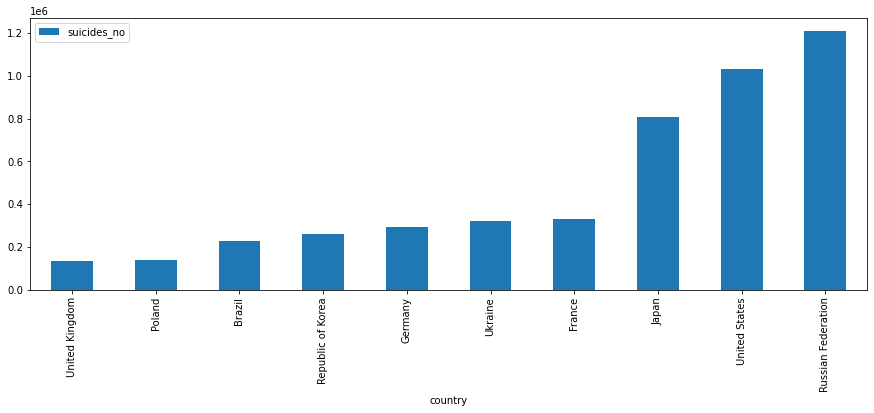

In [37]:
#Highest suicide rate by country
suicide_data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country', y='suicides_no', kind='bar', figsize=(15,5))

* Russia has the highest number of suicides followed by the US and Japan
* Russia, the US and Japan have exceptionally high counts of suicides compared to the others in a lot

## Bar plot to check Number of Suicides by bottom Countries

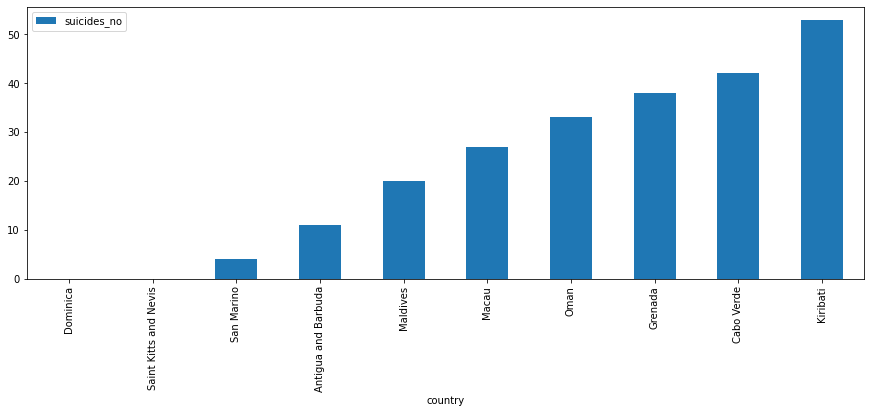

In [49]:
suicide_data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                            ascending=True).head(10).plot(x='country', y='suicides_no', kind='bar', figsize=(15,5))
plt.show()

Bar plot for Number of Suicides vs Age

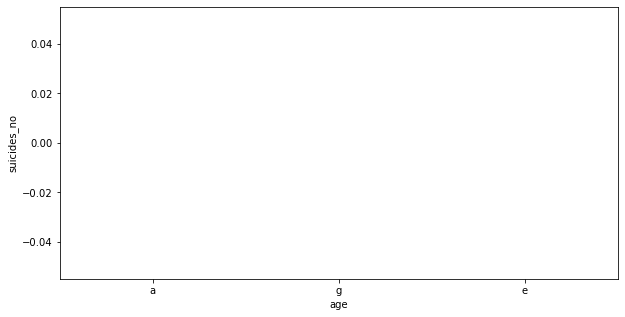

In [12]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='age', y='suicides_no', data=suicide_data, order='age', palette='muted') #barplot

In [4]:
# Is the suicide rate more prominent in some age categories than others?
#let's sum up the number of suicides divided by population, and grouped by age categry



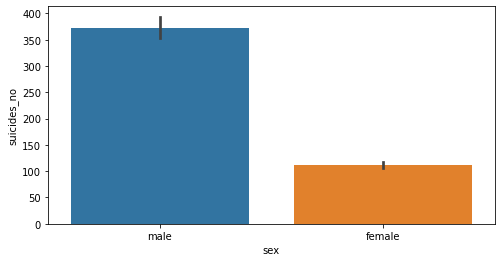

In [56]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='sex', y='suicides_no', data=suicide_data)

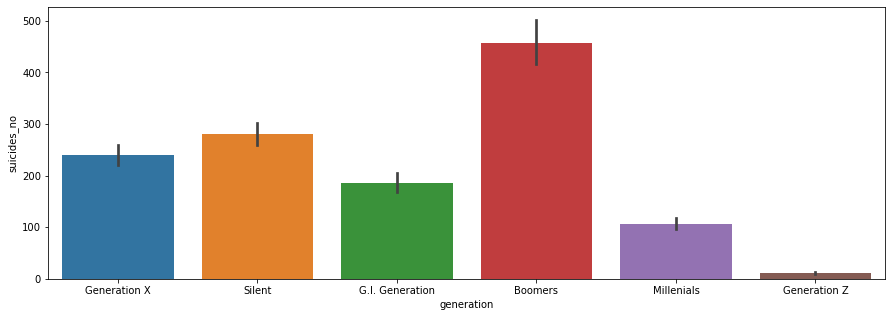

In [57]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='generation', y='suicides_no', data=suicide_data)

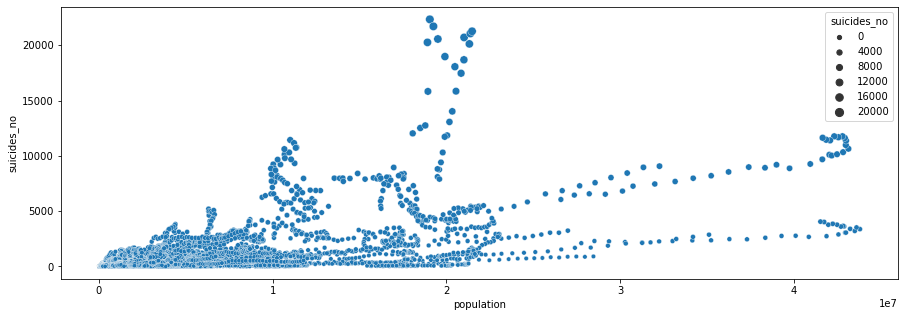

In [5]:
figure = plt.figure(figsize= (15,5))

ax = sns.scatterplot(x=suicide_data['population'], y='suicides_no', data=suicide_data, size= 'suicides_no')

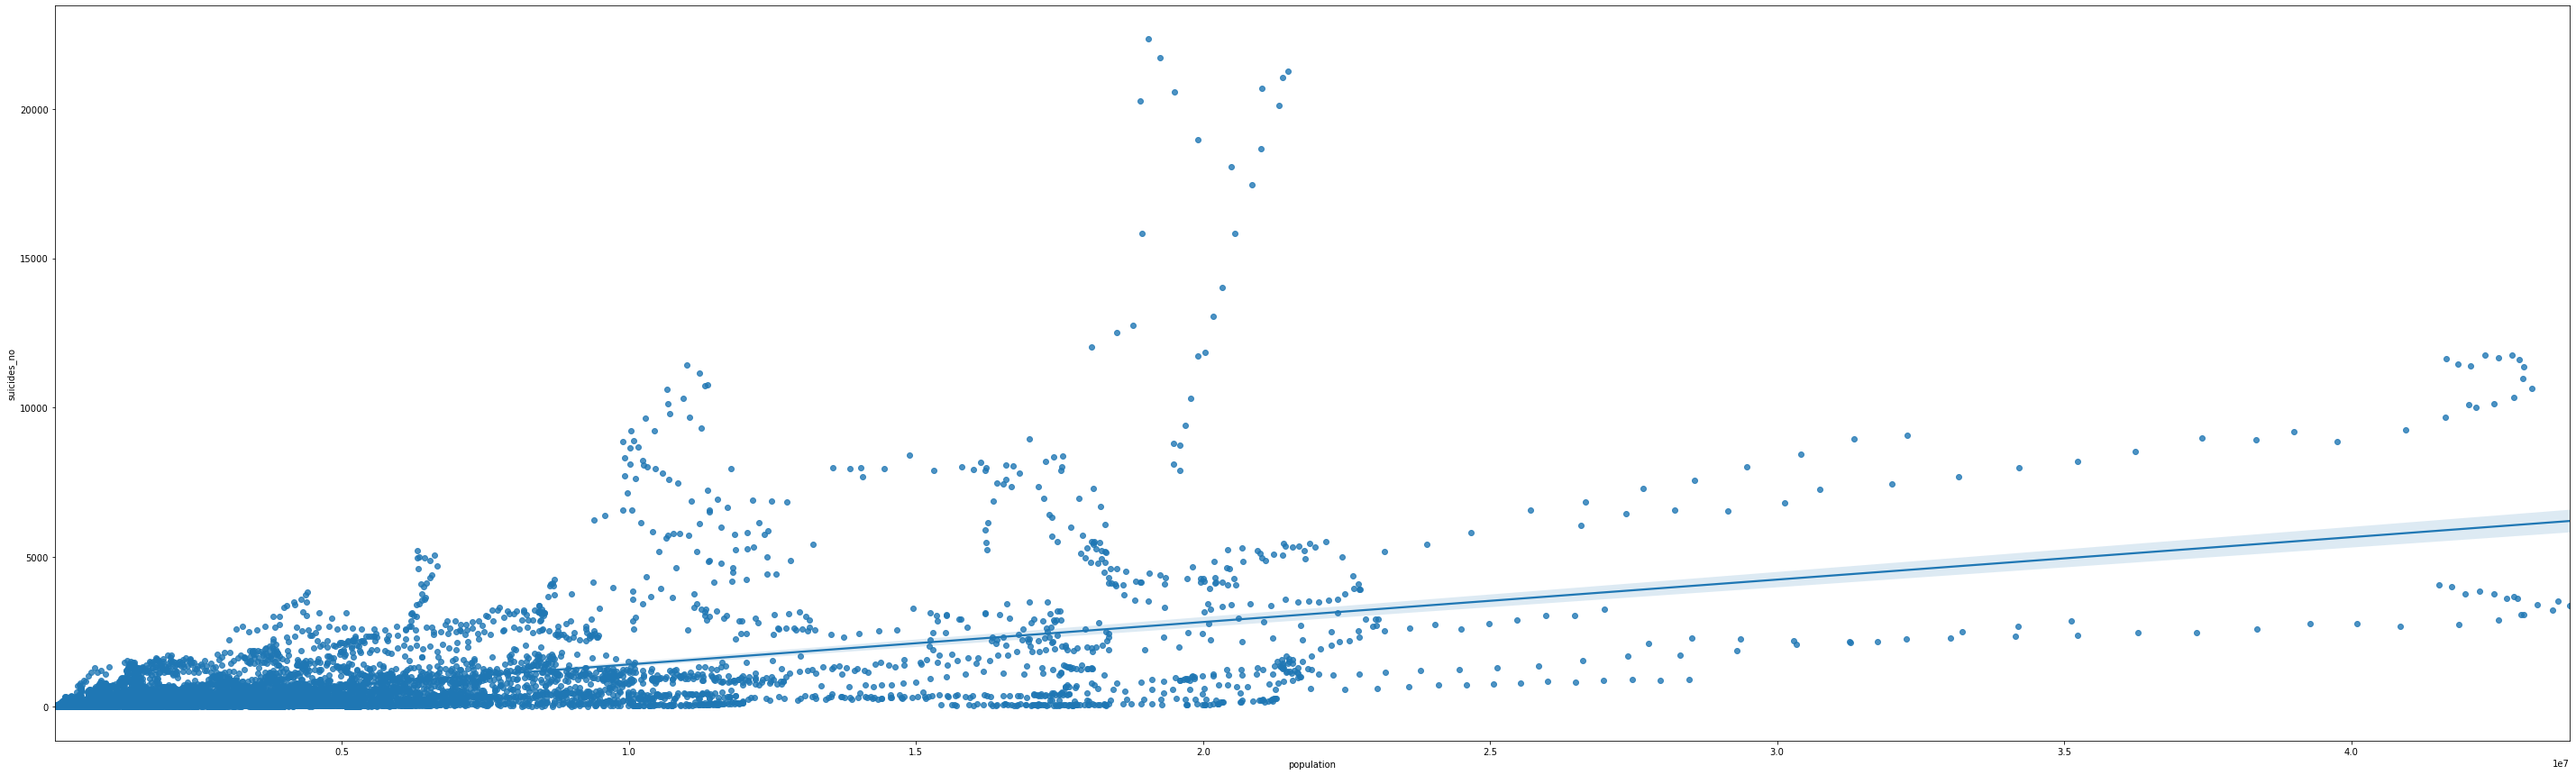

In [4]:
figure = plt.figure(figsize=(50, 15))

ax = sns.regplot(x='population', y='suicides_no', data=suicide_data) #regression plot

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

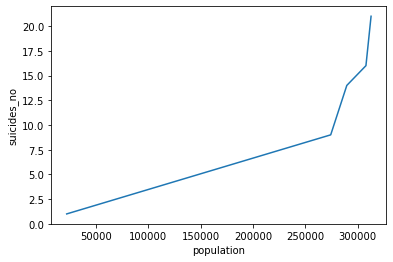

In [6]:
#here we are plotting a line plot
sns.lineplot(x='population', y='suicides_no', data=suicide_data.head())

## Scatterplot Number of Suicides/100kPopulation vs GDP per Capita

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

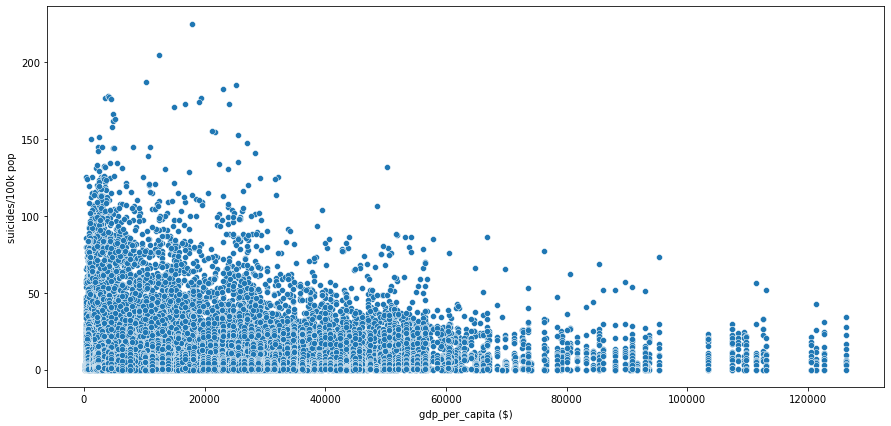

In [8]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=suicide_data)

## Correlation among pairs of continuous variables

<function matplotlib.pyplot.show(close=None, block=None)>

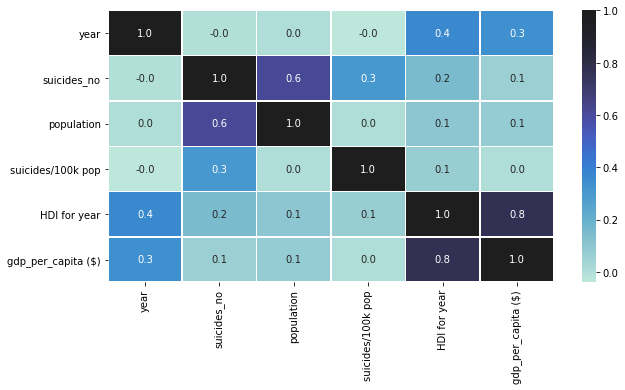

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(suicide_data.corr(), annot=True, linewidth=.5, fmt ='.1f', center = 1)
plt.show

* Insead of doing a simple df.corr() we can use the heatmap when there are a large number of variables.
* The color helps with picking out the most correlated easily
* In the above case, we don't have a lot of variables the plot is just for demonstration
* The darker the color the higher the correlation
* None of the attributes seem to have correlation of real s ignificance
* Some obvious correlations are that in a larger population it is very likely that the number of suicides will be more 
* Human Development Index - gdp per capita is the only pair with the most correlation 

#### Bar plot to check Number of suicides by sex and age (three variables used to generate a single plot)

### this is an example of Numerical and 2 Categorical variables 

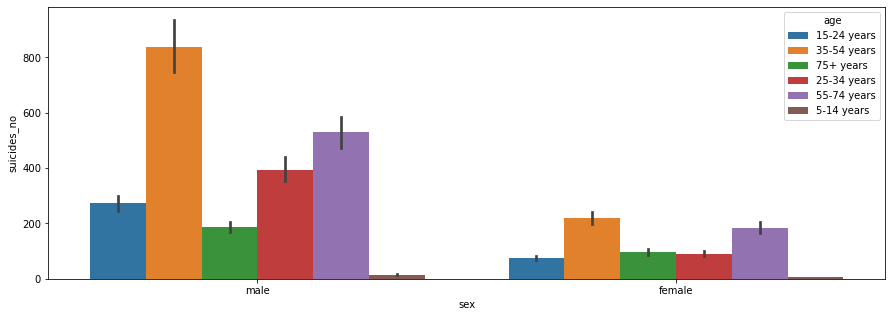

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(data=suicide_data, x='sex', y='suicides_no', hue='age')
plt.show()

# Checking the no. of suicides: Country vs sex 

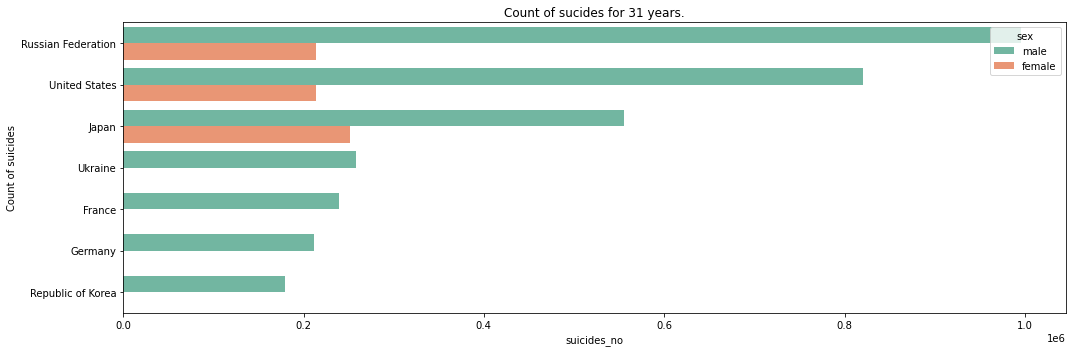

In [22]:
suic_sum_m = suicide_data['suicides_no'].groupby([suicide_data['country'], suicide_data['sex']]).sum() 
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no', ascending=False)
most_cont_m = suic_sum_m.head(10) 

fig = plt.figure(figsize=(15,5))
plt.title('Count of sucides for 31 years.')

sns.barplot(y='country', x='suicides_no', hue='sex', data=most_cont_m, palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()

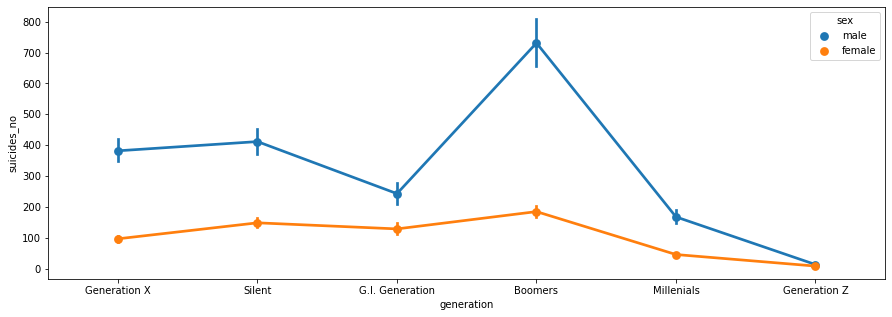

In [24]:
plt.figure(figsize=(15,5))

sns.pointplot(x='generation', y='suicides_no', hue='sex', data=suicide_data)
plt.show()

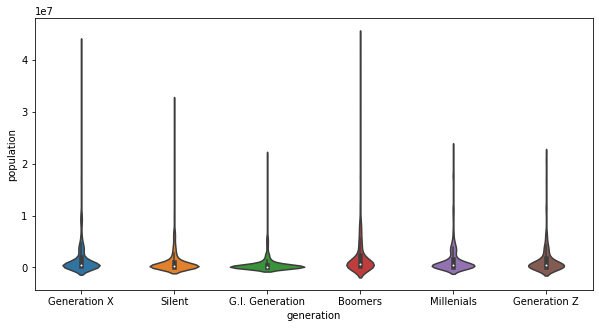

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(x=suicide_data.generation, y=suicide_data['population'])
plt.show()

* The plot is similar to a box plot but here we get a density visualization
* Distribution of population across every generation is highly skewed
* Potential of a lot of outliers
* To do: build a box plot of outliers of this exact visualization

### Checking trends with Temoral data

Temporal data is simply data that represents a state in time, such as the land-use patterns in Hong Kong in 1990, or total rainfall in Honolulu on July 1, 2009. Temporal data is collected to analyze weather patterns and other environmental variables, monitor traffic conditions, study demographic trends, and so on. This data comes from many sources ranging from manual data entry to data colected using observational sensors or generated from simulation models. 

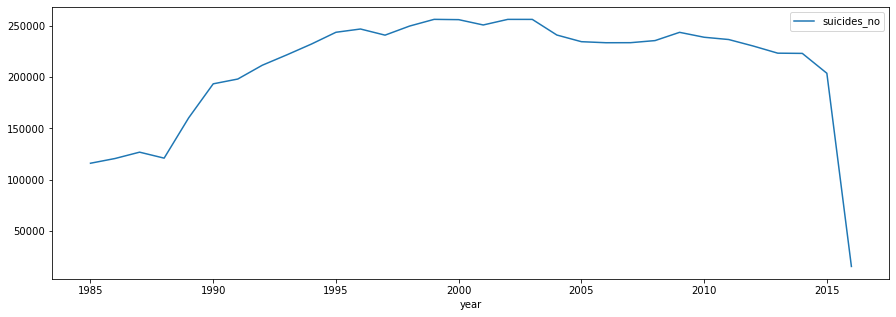

In [27]:

suicide_data[['year', 'suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()


### Checking pattern using Trend plot (1985-2015) Population vs Years

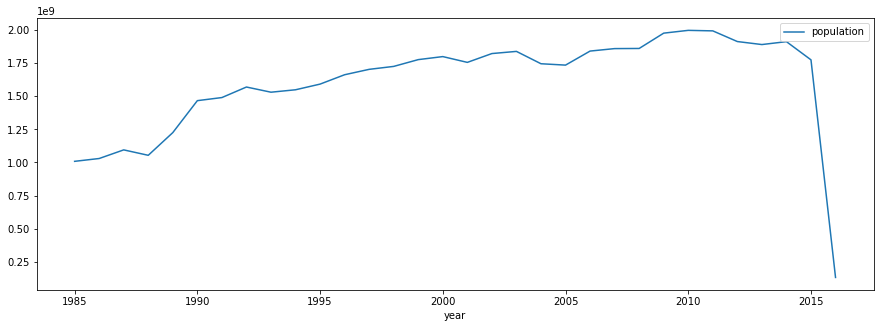

In [32]:
suicide_data[['year', 'population']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

### Checking pattern using trend plot (1985-2015) suicides/100kpop vs years

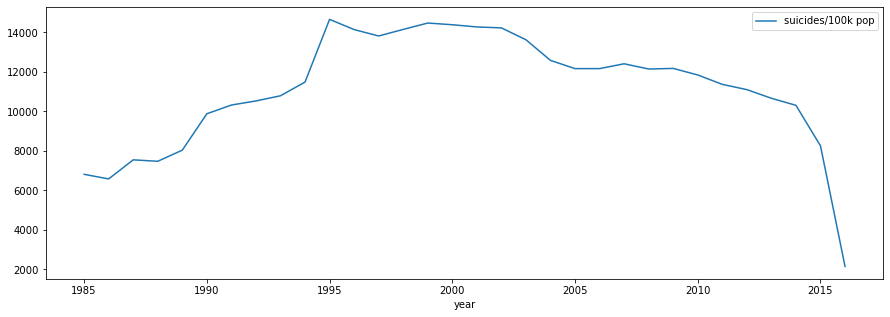

In [34]:
suicide_data[['year', 'suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

### Pandas Profiling with IPL data

In [ ]:
Generates profile reports 

In [8]:

suicide_data

,age,suicides_no,population
0,15-24 years,21,312900
1,35-54 years,16,308000
2,15-24 years,14,289700
3,75+ years,1,21800
4,25-34 years,9,274300
5,75+ years,1,35600


In [11]:
suicide_data[["age", "suicides_no"]].sort_values("age")

,age,suicides_no
0,15-24 years,21
4431,15-24 years,387
12593,15-24 years,7
4428,15-24 years,1293
12599,15-24 years,65
...,...,...
23208,75+ years,21
11511,75+ years,159
23204,75+ years,38
11523,75+ years,146


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [14]:
data = {'A':[1,2,3,4,5], 'B':[1,0,1,1,0]}
df = pd.DataFrame(data=data)
df.C = df.A + df.B

<ipython-input-14-8d42cb36bc2c>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.C = df.A + df.B


In [17]:
df

,A,B
0,1,1
1,2,0
2,3,1
3,4,1
4,5,0


In [16]:
df.iloc[::-1,:]

,A,B
4,5,0
3,4,1
2,3,1
1,2,0
0,1,1


In [21]:
series_a = pd.Series([101,102,103,104,105,106])
series_b = pd.Series([107,108,109,110,111,112])

In [23]:
pd.concat([series_a, series_b])

0    101
1    102
2    103
3    104
4    105
5    106
0    107
1    108
2    109
3    110
4    111
5    112
dtype: int64

In [25]:
pd.concat([series_a, series_b], keys = ['a', 'b'], names=['Series', 'Row ID'])

Series  Row ID
a       0         101
        1         102
        2         103
        3         104
        4         105
        5         106
b       0         107
        1         108
        2         109
        3         110
        4         111
        5         112
dtype: int64

In [29]:
df_1 = pd.DataFrame({
    'Name' : ['eby', 'edwin', 'suba', 'prabha', 'jon'],
    'Company': ['Apple', 'Walmart', 'Intel', 'cumins', 'Ford'],
    'Salary': [67000, 90000, 87000, 69000, 78000]},
    index=[101,102,103,104,105])
print("The first dataframe is : \n", df_1, "\n\n")

df_2 = pd.DataFrame({
    'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
    'Company': ['Cognizant', 'Apple', 'Intel', 'Cumins', 'Walmart'],
    'Salary': [89000, 80000, 79000, 97000, 88000]},
    index=[101,102,103,104,105]
)

print("The second dataframe is: \n", df_2)

The first dataframe is : 
        Name  Company  Salary
101     eby    Apple   67000
102   edwin  Walmart   90000
103    suba    Intel   87000
104  prabha   cumins   69000
105     jon     Ford   78000 


The second dataframe is: 
       Name    Company  Salary
101  Billy  Cognizant   89000
102  Brian      Apple   80000
103   Bran      Intel   79000
104  Bryce     Cumins   97000
105  Betty    Walmart   88000


In [31]:
import numpy as np
import pandas as pd

ser1 = pd.Series(list('abcd'))
ser2 = pd.Series(np.arange(4))

In [32]:
ser1

0    a
1    b
2    c
3    d
dtype: object

In [33]:
ser2

0    0
1    1
2    2
3    3
dtype: int64

In [39]:
df = pd.DataFrame({'col1':ser1, 'col2':ser2})

In [40]:
df

,col1,col2
0,a,0
1,b,1
2,c,2
3,d,3


In [41]:
df = pd.concat([ser1, ser2], axis=0)

In [43]:
df = pd.concat([ser1,ser2], axis=1)

In [44]:
df

,0,1
0,a,0
1,b,1
2,c,2
3,d,3


In [3]:
import pandas as pd
header = pd.MultiIndex.from_product([['Before Course', 'After Course'],['Marks']])
d=([[82,95],[78,89], [78,87], [76,89],[66,89]])

my_df = pd.DataFrame(d, index=['Alisa', 'Bobby', 'Cathrine', 'Jack', 'Mia'],
                    columns=header)
my_df

,Before Course,After Course
,Marks,Marks
Alisa,82,95
Bobby,78,89
Cathrine,78,87
Jack,76,89
Mia,66,89


In [5]:
stacked_df = my_df.stack()

In [13]:
unstacked_df = my_df.unstack(level=0)

In [14]:
unstacked_df


Before Course  Marks  Alisa       82
                      Bobby       78
                      Cathrine    78
                      Jack        76
                      Mia         66
After Course   Marks  Alisa       95
                      Bobby       89
                      Cathrine    87
                      Jack        89
                      Mia         89
dtype: int64

In [23]:
header = pd.MultiIndex.from_product([['Before Course','After Course'],['Marks']])
d=([[82,95],[78,89]])
 
my_df = pd.DataFrame(d,
 index=['Alisa','Bobby'],
 columns=header)

print(my_df.stack(level=0).unstack(level=0))

              Marks      
              Alisa Bobby
After Course     95    89
Before Course    82    78


In [22]:
header = pd.MultiIndex.from_product([['Marks'], ['Before Course','After Course']])
d=([[82,95],[78,89]])
 
my_df = pd.DataFrame(d,
 index=['Alisa','Bobby'],
 columns=header)

print(my_df.stack(level=0).unstack(level=0))

      After Course       Before Course      
             Alisa Bobby         Alisa Bobby
Marks           95    89            82    78
